In [1]:
%reset -f
%run pylib/kde_doc paper dark

all_data = kde_setup(title='BCU+UNK studies').copy()
all_data['bayes_prob'] = all_data.assoc_prob.apply(lambda x: 0.5 if pd.isna(x) else x )
all_data['G']= all_data.diffuse # for convenience
subgrp = all_data.groupby('subset')
unid = subgrp.get_group('unID').copy()
galfunc = GalFunctions(all_data)

from pylib.catalogs import Fermi4FGL
dr4 = Fermi4FGL()
# add the LR prob and ASSOC1 to the table
data_mask = np.isin(dr4.index,all_data.index) # since all_data is subset of dr4
all_data['lr_prob'] = dr4.get_series('ASSOC_PROB_LR').astype(float)[data_mask]
all_data['assoc1'] = list(map(lambda s: s.strip(), dr4.get_series('ASSOC1')[data_mask]))

set_theme('dark');
palette =['cyan', 'magenta', 'yellow'] if dark_mode else 'green red blue'.split()
show(f"""*  define ASSOC1 catalog id""")
def first_tok(s):
    t = s.strip() 
    if len(t)==0: return ''
    return t.split()[0]
all_data['assoc_cat'] = all_data.assoc1.apply(first_tok)
unk=all_data.groupby('class1').get_group('unk').copy()
bcu=all_data.groupby('class1').get_group('bcu').copy()


<font size="+3"> BCU+UNK studies</font>

<h5 style="text-align:right; margin-right:15px"> 2024-10-18 14:11</h5>

# Data setup
* Load source data from `files/dr4_2_class_3_features.csv'

### Data selection cut: "Ep<10 & variability<30"

association_class,blazar,pulsar,Gal,egal,bcu_unk,unID
total,2283,316,219,88,1698,2205
selected,770,308,195,53,1043,1934
%,34,97,89,60,61,88


# Create KDE functions instead of ML training

* Features: sqrt_d, log_epeak, diffuse 

saved KDE setup to `files/kde_data.csv`

Loaded Fermi 4FGL gll_psc_v32.fit: 7195 entries


*  define ASSOC1 catalog id

# BCU & UNK
Can we learn anything about gevatar association probability?

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fbd8fbea8c0>
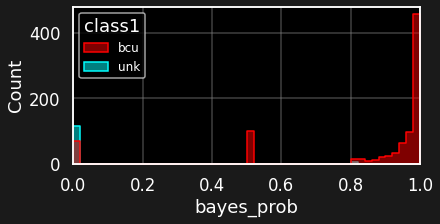

FileNotFoundError: [Errno 2] No such file or directory: 'figures/galacticity-dev/bayes_prob.png'

In [2]:
show(f"""# BCU & UNK
Can we learn anything about gevatar association probability?""")
def bayes_prob(data):
    fig, ax = plt.subplots(figsize=(6,3))
    sns.histplot(data,ax=ax, x='bayes_prob', hue='class1', 
                 hue_order='bcu unk'.split(), bins=50, element='step',
                palette='red cyan'.split(), alpha=0.5)
    sns.move_legend(ax, loc='upper left', fontsize=12)
    ax.set(xlim=(0,1), xlabel='bayes_prob')
    return fig
show_fig(bayes_prob, all_data, facecolor='k', save_to='figures/galacticity-dev/bayes_prob.png')

In [ ]:
def bcu_unk(self, data):
    cuts =   [ ' bayes_prob<0.5 & d>0.3 & Ep<10','bayes_prob>=0.5',  ]
    titles = ['LR in corner', 'Bayes + confirmed']
    fig = plt.figure(layout='constrained', figsize=(20,8))
    subfigs = fig.subfigures(1, 2, wspace=0.07)
    for  cut, subfig, title in zip(cuts, subfigs,titles):
         galfunc.multiplot( data, cut, title+f' ({len(data.query(cut))})', fig=subfig)      

    fig.suptitle( 'BCU+UNK: Compare association methods', x=0, ha='left')
    return fig

show_fig(bcu_unk, galfunc, all_data.query('association_class=="bcu_unk"'), 
         facecolor='k', save_to='figures/galacticity-dev/BCU+UNK.png')    

In [ ]:
show(f"""## Which catalogs are used for associations?
Study the ASSOC1 catalog id""")
def first_tok(s):
    t = s.strip() 
    if len(t)==0: return ''
    return t.split()[0]
all_data['assoc_cat'] = all_data.assoc1.apply(first_tok)
unk=all_data.groupby('class1').get_group('unk').copy()
bcu=all_data.groupby('class1').get_group('bcu').copy()

show(f"""* all_data: {len(all_data)} total""")
t = np.unique(all_data.assoc_cat,return_counts=True)
show( pd.Series(dict( (k,v) for k,v in zip(*t)),name='') .sort_values(ascending=False))
# all_data.assoc_cat

t = np.unique(all_data.query('association_class=="bcu_unk" & assoc_prob<0.8').assoc_cat,return_counts=True)
show(f"""* bcu & unk, {sum(t[1])} total""")
show((t:=pd.Series(dict( (k,v) for k,v in zip(*t)),name='')) .sort_values(ascending=False))

In [ ]:
show(f"""## Follow-up of the NULL Bayes probability guys
From the [4FGL paper](https://iopscience.iop.org/article/10.3847/1538-4365/ab6bcb):
>The false-association rate is difficult to estimate for the new associations resulting from these follow-up observations, preventing them from being treated on the same footing as those obtained as described above. The most recent Radio Fundamental Catalog96 (RFC) includes many new entries that came from dedicated follow-up observations. Applying the Bayesian method to the whole catalog and retaining associations with P ≥ 0.8, the association probability attached to the recent additions (181 sources) are reported as NULL to distinguish them from the others.""")
tt = dr4[pd.isna(dr4.assoc_prob)]
show(f""" The 4FGL-DR4 catalog has {len(tt)} NULL entries, in the classes,""")
show(pd.Series(tt.groupby('class1').size().sort_values(ascending=False), name='NULL Bayes'))

show(f"""In this subset there are {sum(all_data.bayes_prob==0.5)}, in the classes, """)
show(pd.Series(all_data[all_data.bayes_prob==0.5].groupby('class1').size().sort_values(ascending=False),
              name='NULL Bayes'))
show(f"""The associated catalog for the subset, and our bcu's:""")
show(pd.Series(all_data[all_data.bayes_prob==0.5].groupby('assoc_cat').size().sort_values(ascending=False),
              name='NaN Bayes'))
show(pd.Series(all_data[(all_data.bayes_prob==0.5) & (all_data.class1=='bcu')].groupby('assoc_cat').size().sort_values(ascending=False),
              name='NaN Bayes'))

In [ ]:
show(f"""* Generate a cvs file,`{(to_kent:='files/bcu_unk.csv')}` for Kent""")
bcu_unk = all_data.groupby('association_class').get_group('bcu_unk'); len(bcu_unk)
z = bcu_unk['class1 assoc_prob lr_prob assoc1 assoc_cat'.split()]
z.to_csv(to_kent, float_format='%.3f')

In [ ]:
show(f"""### Check NVSS-associated subset""")
u = all_data.query('assoc_cat=="NVSS"') 
show(f"""There are {len(u)} entries, with the following class1 sources""")
show(pd.Series(u.groupby('class1').size(), name='sources'))

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4))

kws = dict( hue='class1', hue_order='bcu unk bll'.split(),palette=palette, )
sns.histplot(u,ax=ax1, x=np.abs(u.glat) , **kws, #np.sin(u.glat)), 
            bins=np.arange(0,90.1,2), element='step', fill=False );
ax1.set(xlabel=r'$|b|$', xlim=(0,90));

sns.histplot(u,ax=ax2, x='G', **kws,
            bins=np.arange(-1,2.001, 0.1), element='step', fill=False )
ax2.set(xlabel=r'$G$', xlim=(-1,2));

sns.kdeplot(u,ax=ax3, x='G', **kws,           )
ax3.set(xlabel=r'$G$', xlim=(-1,2), ylabel='KDE density');
show(fig)
show("""* unk, with $|b|<10$ selection, mostly young pulsars
* Note how $G$ spreads out the $|b|<10$ selection.
* bcu has large Galactic component""")


In [ ]:
show(f"""## Look at ASSOC_PROB_LR='LR prob'""")

hkw = dict(x='lr_prob', bins=np.arange(0,1.001,0.02), element='step', edgecolor='w', color='cyan')

fig, axx = plt.subplots(3,1, figsize=(6,6), sharex=True)
sns.histplot(all_data, ax=axx[0], **hkw, label='all data' 
            ).set(yscale='log',xlim=(0,1))
axx[0].legend(loc='upper center')
for name, ax in zip('unk bcu'.split(), axx[1:]):
    sns.histplot(all_data.query(f'class1=="{name}"'),ax=ax, **hkw, label=name,
                ).set(xlim=(0,1))
    ax.legend(loc='upper center')
show(fig)
show("""* Suspicious shape for the unk category""")


check = all_data.query('lr_prob>0.8 & (class1=="unk" | class1=="bcu")')
check.hist('bayes_prob', bins=np.arange(0,1.001,0.02));
plt.gca().set(title='bcu+unk, lr_prob>0.8', xlabel='bayes prob', xlim=(0,1));
show(plt.gcf())


In [ ]:
show(f""" Which sources have assoc_prob==NaN, but non-zero lr_prob?""")
check1 = all_data[pd.isna(all_data.assoc_prob) & (all_data.lr_prob>=0.01)]['class1 lr_prob assoc_prob'.split()]
show(check1)

show(f"""Source classes with ONLY LR association""")
check1 = all_data[(all_data.assoc_prob<0.8) & (all_data.lr_prob>0.8)]['class1 lr_prob assoc_prob'.split()]
show(pd.Series(check1.groupby('class1').size(), name='sources').sort_values(ascending=False))
show(f"""Source classses with both associations""")
check1 = all_data[(all_data.assoc_prob>.8) & (all_data.lr_prob>0.8)]['class1 lr_prob assoc_prob'.split()]
show(pd.Series(check1.groupby('class1').size(), name='sources').sort_values(ascending=False))

In [ ]:
show(f"""# Look at the DR4 association file""")
import os
from astropy.io import fits
from astropy.table import Table
psc_flags= '/mnt/c/users/thbur/OneDrive/fermi/catalog/gll_pscP305uw1410_v4r2_assoc_v8r10p8_flags.fits'
with fits.open(psc_flags) as hdus:
    ptsrc = hdus[1].data
    cat_ref = hdus[8].data
    print(hdus.info())

In [ ]:
show(np.unique(ptsrc.ID_Number,return_counts=True))
show(cat_ref.columns)

In [ ]:
show(cat_ref)

In [ ]:
ptsrc.columns